In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import matplotlib.pyplot as plt
import halma as h
import numpy as np
import game_tree as g
import imageio.v2 as imageio



In [25]:
game = h.Halma(h.get_board())
moves = game.get_available_moves(1)


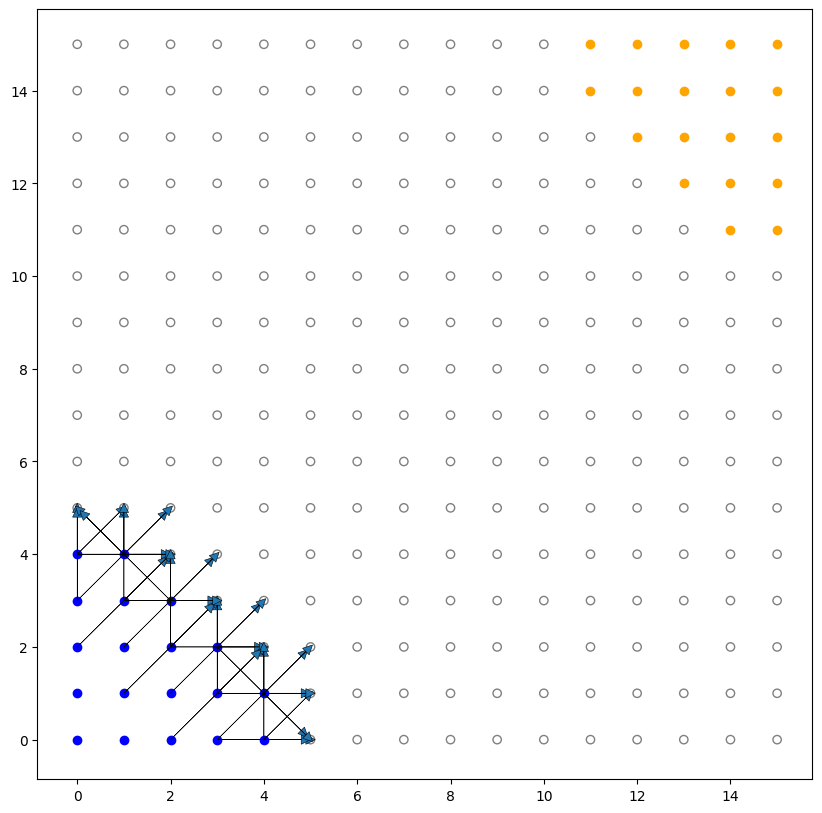

In [26]:
import random
def draw_board(board, alpha=1):
    for i in range(len(board)):
        for j, v in enumerate(board[i]):
            if v == 0:
                plt.scatter(i,j, facecolors='none', color = 'gray', alpha=alpha)
            elif v == 1:
                plt.scatter(i,j,  color = 'blue', alpha=alpha)
            else:
                plt.scatter(i,j,  color = 'orange', alpha=alpha)

def draw_moves(moves):
    for move in moves:
        xs, ys = move.src 
        xd, yd = move.dest
        offset = 0
        plt.arrow(xs+offset, ys+offset, 0.9*(xd-xs), 0.9*(yd-ys), head_width=0.2, head_length=0.2, linewidth=0.4)

plt.figure(figsize=(10,10))
draw_board(game.game_state.board)

draw_moves(moves)



In [27]:
game.make_move(moves[0])


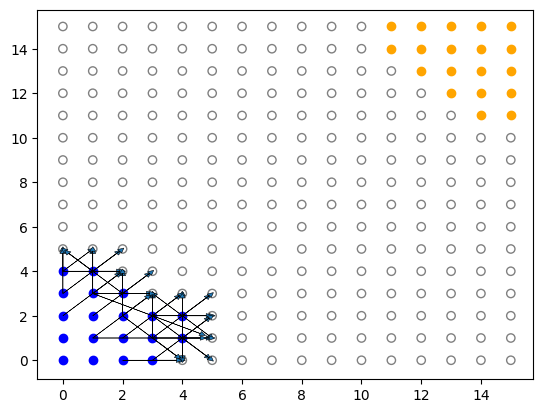

In [28]:
draw_board(game.game_state.board)
moves = game.get_available_moves(1)
draw_moves(moves)


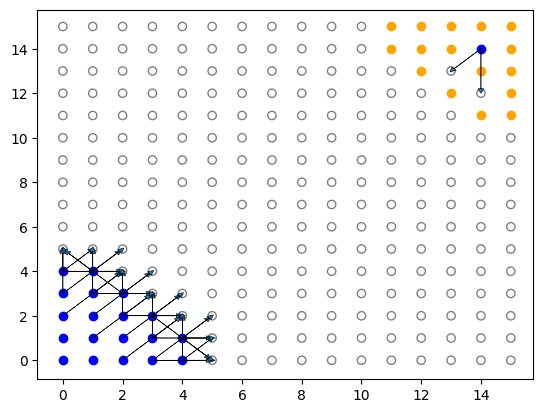

In [29]:
import halma as h

g2 = h.Halma(h.get_board())

g2.game_state.board[14, 14] = 1
g2.game_state.player_1.add((14,14))
g2.game_state.board[13, 13] = 0
g2.game_state.board[14, 12] = 0


#print(len()
moves  = g2.get_available_moves(1)

draw_board(g2.game_state.board)
draw_moves(moves)

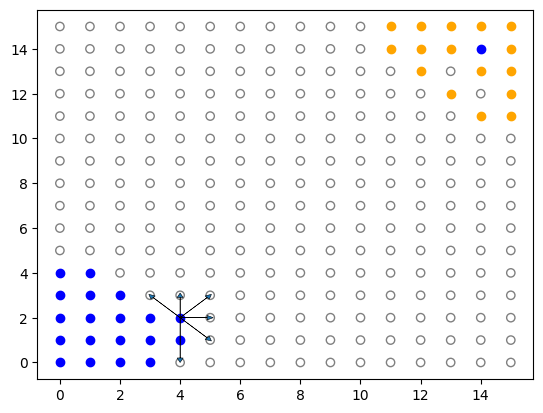

In [30]:
g2.make_move(moves[0])
draw_board(g2.game_state.board)
moves = g2.get_pawn_moves(moves[0].dest, g2.game_state.board)
draw_moves(moves)

In [31]:
def anim(g: h.Halma, path, p, frames=20, out_name="game.gif"):
    def klatka(moves, board, filename):
        draw_board(board)
        draw_moves(moves)
        plt.savefig(filename)
        plt.close()

    initial_move = h.Move(src=None, dest=p)
    moves = [initial_move]
    prev_m = None
    images = []
    for i in range(frames):
        filename = f"{path}_{i}.png"
        moves = g.get_available_moves(1)
        move = random.choice(moves)
        plt.scatter(move.dest[0], move.dest[1], facecolors='none', color = 'red', s=2, alpha=0.5)
        klatka(filter(lambda m: m.src == move.src, moves), g.game_state.board, filename)
        images.append(imageio.imread(filename))
        g.make_move(move)
        prev_m = move
        

    imageio.mimsave(out_name, images, fps=1, loop=4)


In [32]:
def anim_game_tree(gt: g.GameTree, path, frames=20, out_name="game.gif", depth=2):
    def klatka(moves, board, filename):
        draw_board(board)
        draw_moves(moves)
        plt.savefig(filename)
        plt.close()

    images = []
    is_max_agent = True
    for i in range(frames):
        filename = f"{path}_{i}.png"
        win_condition, move = gt.alpha_beta_dispatcher(
                depth,
                is_max_agent
        )

        if win_condition <= float('-inf') or  float('inf') <= win_condition:
            break
        is_max_agent = not is_max_agent
        klatka([move], gt.halma.game_state.board, filename)
        gt.halma.make_move(move)
        images.append(imageio.imread(filename))
    
    imageio.mimsave(out_name, images, fps=1, loop=4)




KeyboardInterrupt: 

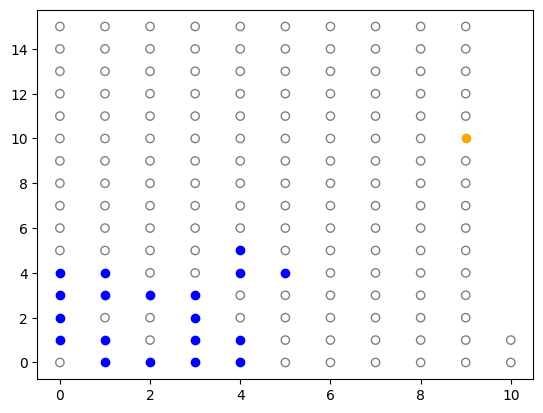

In [33]:
board = h.get_board()
gt = g.GameTree(h.Halma(board))
anim_game_tree(gt, path='imgs/absolute_heurestic_depth_3_to_end_game', depth=3, frames=300, out_name="alpha_beta_2_abs_heur.gif")

In [ ]:
gt.halma.player2_camp

{(11, 14),
 (11, 15),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 12),
 (13, 13),
 (13, 14),
 (13, 15),
 (14, 11),
 (14, 12),
 (14, 13),
 (14, 14),
 (14, 15),
 (15, 11),
 (15, 12),
 (15, 13),
 (15, 14),
 (15, 15)}